In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('ANTM.JK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


In [ ]:
# 'Date' is the datetime column
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


In [ ]:
df = df[['Adj Close', 'Close']]
df.head()

,Adj Close,Close
Date,,
2005-09-29,304.904572,432.588074
2005-09-30,322.666016,457.787384
2005-10-03,331.546692,470.387024
2005-10-04,334.506927,474.586914
2005-10-05,340.427429,482.986694


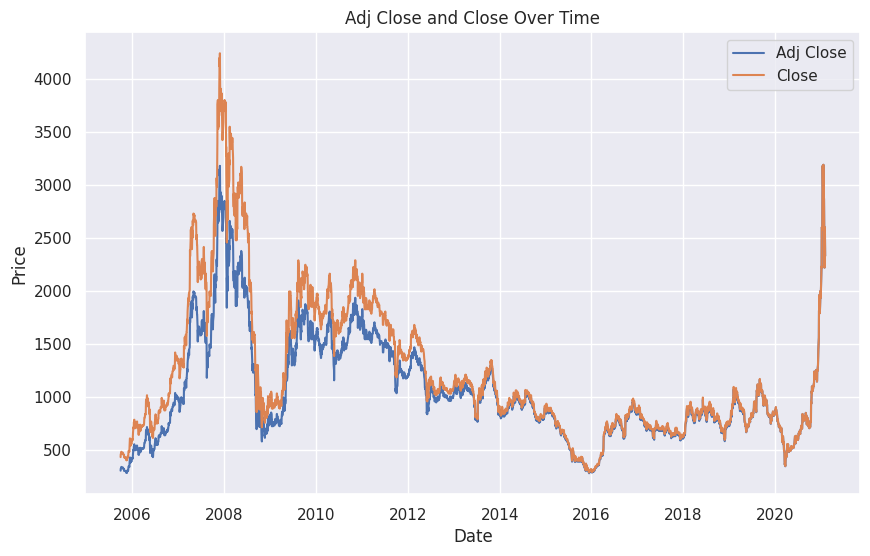

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close')
plt.plot(df.index, df['Close'], label='Close')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Adj Close and Close Over Time')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
df = df[['Adj Close']]
df.head()

,Adj Close
Date,
2005-09-29,304.904572
2005-09-30,322.666016
2005-10-03,331.546692
2005-10-04,334.506927
2005-10-05,340.427429


In [ ]:
df.isnull().sum()

Adj Close    1
dtype: int64

In [ ]:
df.dropna(inplace=True)

<ipython-input-8-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


# Normalize the Data and Train Test Split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split the data into training and testing sets
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

# Create sequences for LSTM

In [ ]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)

sequence_length = 10  # You can adjust this based on your preference
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build and train the LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
# First LSTM layer with dropout
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Second LSTM layer with dropout
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer with dropout
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
# Dense layer
model.add(Dense(units=50))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(units=1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
48/48 [==============================] - 19s 76ms/step - loss: 0.0113
Epoch 2/20
48/48 [==============================] - 4s 77ms/step - loss: 0.0025
Epoch 3/20
48/48 [==============================] - 3s 57ms/step - loss: 0.0023
Epoch 4/20
48/48 [==============================] - 3s 60ms/step - loss: 0.0026
Epoch 5/20
48/48 [==============================] - 3s 57ms/step - loss: 0.0022
Epoch 6/20
48/48 [==============================] - 4s 92ms/step - loss: 0.0017
Epoch 7/20
48/48 [==============================] - 3s 57ms/step - loss: 0.0016
Epoch 8/20
48/48 [==============================] - 3s 55ms/step - loss: 0.0016
Epoch 9/20
48/48 [==============================] - 3s 57ms/step - loss: 0.0017
Epoch 10/20
48/48 [==============================] - 4s 79ms/step - loss: 0.0016
Epoch 11/20
48/48 [==============================] - 3s 70ms/step - loss: 0.0015
Epoch 12/20
48/48 [==============================] - 3s 57ms/step - loss: 0.0015
Epoch 13/20
48/48 [=================

# Visualize the Actual and Predicted Close Price

24/24 [==============================] - 2s 11ms/step
Mean Squared Error: 5571.107244322043


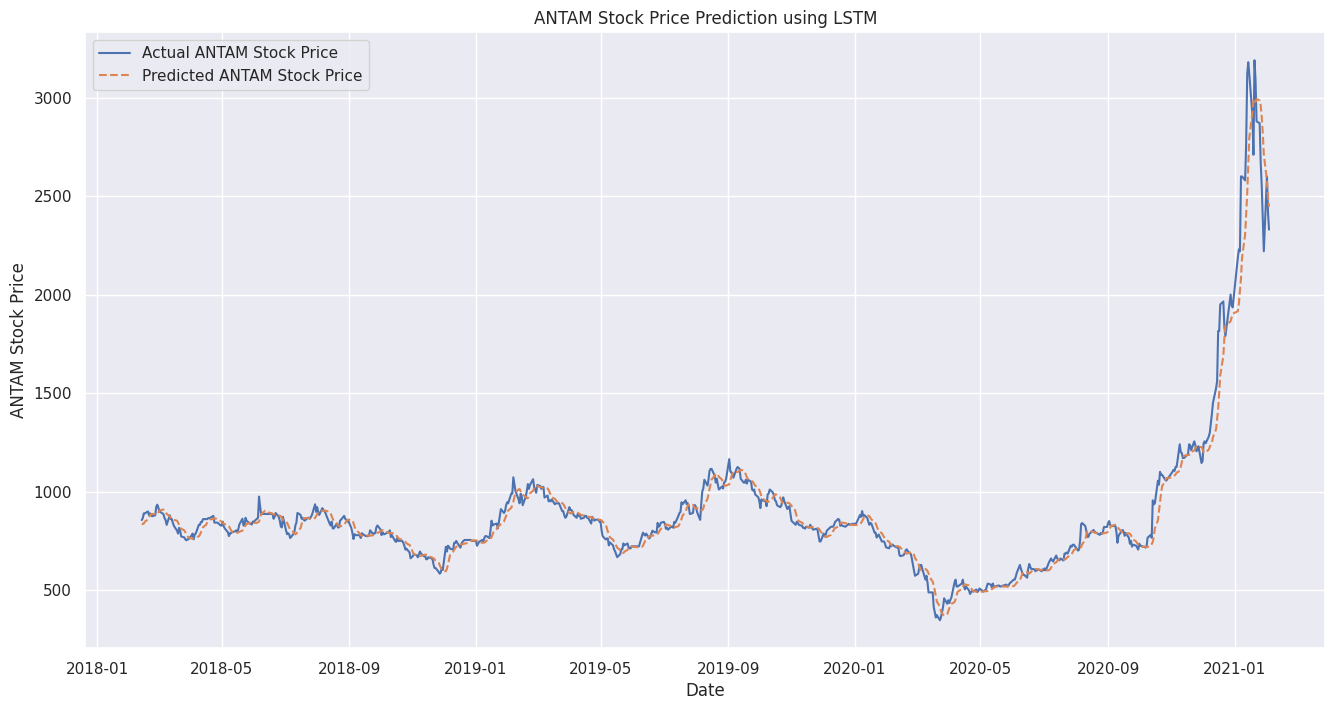

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Evaluate the model (you can use various metrics depending on your requirements)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[-len(predictions):]['Adj Close'], predictions)
print(f'Mean Squared Error: {mse}')

# Plot the predictions
plt.figure(figsize=(16, 8))
plt.plot(df.index[-len(predictions):], df[-len(predictions):]['Adj Close'], label='Actual ANTAM Stock Price')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted ANTAM Stock Price', linestyle='dashed')
plt.title('ANTAM Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('ANTAM Stock Price')
plt.legend()
plt.show()

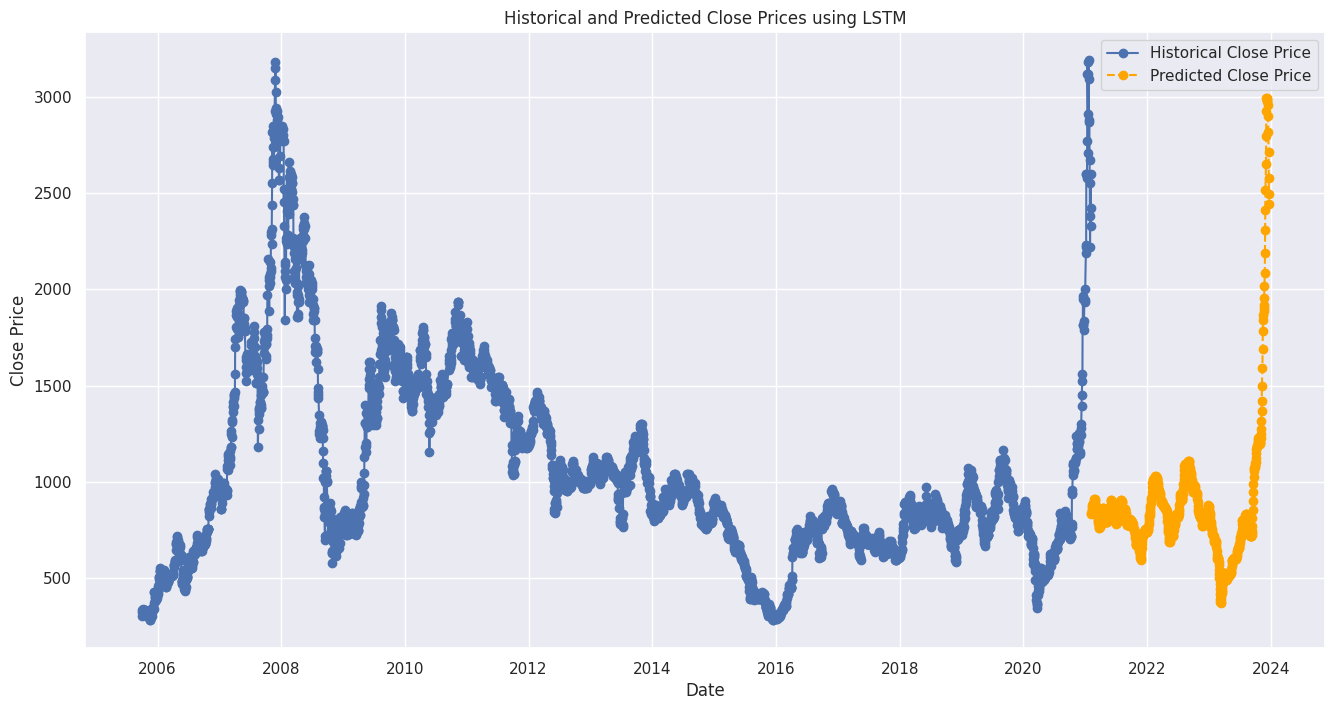

In [ ]:
# Update the column name used for Close Prices
close_price_column = 'Adj Close'

# Plot the historical Close Prices
plt.figure(figsize=(16, 8))
plt.plot(df.index, df[close_price_column], label='Historical Close Price', marker='o', linestyle='-', color='b')

# Plot the predicted Close Prices
predicted_dates = pd.date_range(start=df.index[-1], periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_dates, predictions, label='Predicted Close Price', linestyle='dashed', color='orange', marker='o')

plt.title('Historical and Predicted Close Prices using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()